In [85]:
# import the necessary packages
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(100)

In [86]:
x = np.random.randint(100, size=100)/30 - 2
X = x.reshape(-1, 1)
y = x + -3 + 0.3*np.random.randn(100)

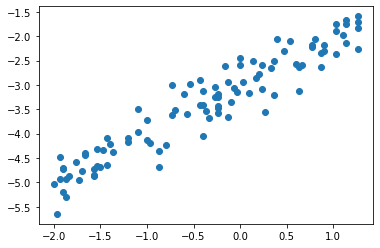

In [88]:
plt.scatter(X, y)

In [89]:
def regularized_linear_regression(X, y, alpha=0.01, lambda_value=1, epochs=30):
    """
    :param x: feature matrix
    :param y: target vector
    :param alpha: learning rate (default:0.01)
    :param lambda_value: lambda (default:1)
    :param epochs: maximum number of iterations of the
           linear regression algorithm for a single run (default=30)
    :return: weights, list of the cost function changing overtime
    """
 
    m = np.shape(X)[0]  # total number of samples
    n = np.shape(X)[1]  # total number of features
 
    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    W = np.random.randn(n + 1, )
 
    # stores the updates on the cost function (loss function)
    cost_history_list = []
 
    # iterate until the maximum number of epochs
    for current_iteration in np.arange(epochs):  # begin the process
        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated = X.dot(W)
 
        # calculate the difference between the actual and predicted value
        error = y_estimated - y
           
        # calculate the cost (MSE) (Equation 1)
        cost_without_regularization = (1/ 2*m) * sum(val**2 for val in (error))
        #cost_without_regularization = (1/ 2*m) * np.sum(error ** 2)        
                
        # regularization term
        reg_term = (lambda_value/ 2*m) * np.sum(np.square(W))
        
        # calculate the cost (MSE) + regularization term (Equation 3)
        cost_with_regularization = cost_without_regularization + reg_term
        
        # calculate the gradient of the cost function with regularization term (Equation )
        
        # gradient (derivative) = 1st term + 2nd term
        # W - all weights
        gradient = ((1/m) * (X.T.dot(error))) + ((lambda_value/m) * W) 
 

        # Now we have to update our weights
        W = W - alpha * gradient
        
        # keep track the cost as it changes in each iteration
        cost_history_list.append(cost_with_regularization)
        
    # Let's print out the cost
    print(f"Cost with regularization: {cost_with_regularization}")
    print(f"Mean square error: {cost_without_regularization}")
 
    return W, cost_history_list

Cost with regularization: 516.5888565058274
Mean square error: 516.5888565058274


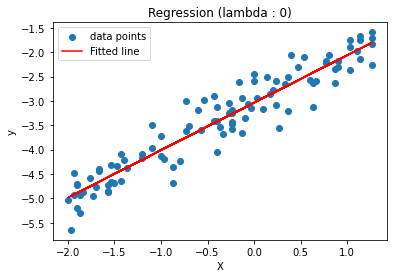

Cost with regularization: 5181.225049184744
Mean square error: 898.2014821513135


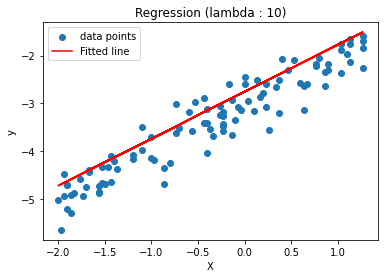

Cost with regularization: 27931.72488740026
Mean square error: 12785.107029715973


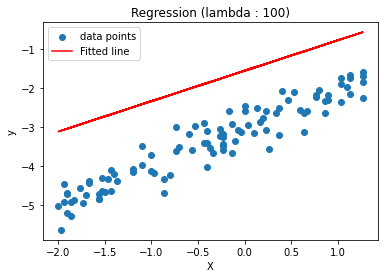

Cost with regularization: 55914.643626066274
Mean square error: 49468.88025066496


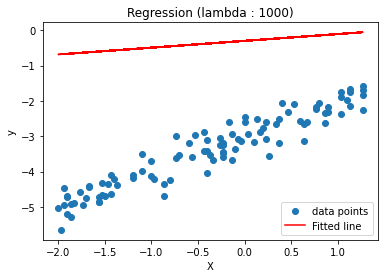

Cost with regularization: 62426.95626933975
Mean square error: 61614.425833558154


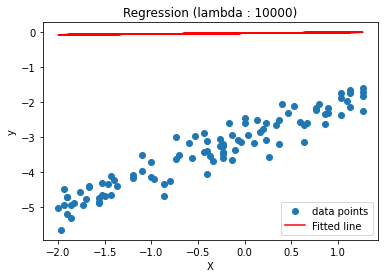

In [90]:
lambda_list = [0, 10, 100, 1000, 10000]
for lambda_ in lambda_list:
    # calls regression function with different values of lambda
    weight, _ = regularized_linear_regression(X, y, alpha=0.01,
                                 lambda_value=lambda_, epochs=1000)
    
    fitted_line = np.dot(X, weight[1]) + weight[0]
    plt.scatter(X, y, label='data points')
    plt.plot(X, fitted_line, color='r', label='Fitted line')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Regression (lambda : {lambda_})")
    plt.legend()
    plt.show()